
# Position changes during a race

Plot the position of each driver at the end of each lap.


In [18]:
import fastf1.plotting
import matplotlib.pyplot as plt


fastf1.plotting.setup_mpl(misc_mpl_mods=False)

Load the session and create the plot



In [23]:
session = fastf1.get_session(2023, 'Belgium', 'R')
session.load(telemetry=False, weather=False)

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '44', '14', '63', '4', '31', '18', '22', '10', '77', '24', '23', '20', '3', '2', '27', '55', '81']


For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
using the value of the first lap, get their color and then plot their
position over the number of laps.



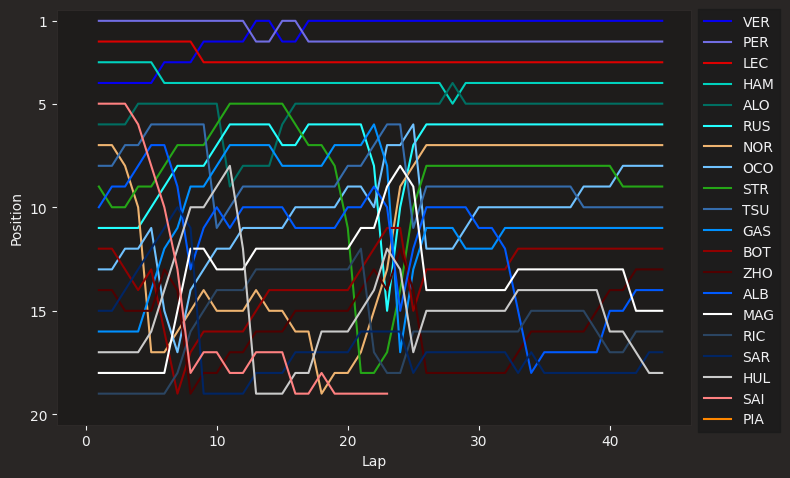

In [24]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()